In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [5]:
df=pd.read_csv(r'C:\Users\mysore\Desktop\Thyroid_Disease_Detection\Dateset\allhypo.data',names=names,na_values='?')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [8]:
df.classes.value_counts()

negative.|16      1
negative.|1146    1
negative.|2658    1
negative.|2578    1
negative.|2071    1
                 ..
negative.|124     1
negative.|1821    1
negative.|2942    1
negative.|1932    1
negative.|679     1
Name: classes, Length: 2800, dtype: int64

In [10]:
df.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes       

In [11]:
#Will split the 'classes' column as it looking weired
last=df.classes.str.split('.',expand=True)
df[['last','final']]=last
data=df.drop(['classes','final'],axis=1)

In [12]:
data_final=data.rename(columns={'last':'classes'})
data_final.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [13]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [14]:
data_final.shape

(2800, 30)

In [15]:
data.to_csv('Thyroid_Data.csv')

In [16]:
#Will drop TBG feature as it has completely nan values

data_final=data_final.drop('TBG',axis=1)

In [17]:
data_final.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [18]:
#Check the null-values of data
data_final.isnull().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          284
T3_measured                    0
T3                           585
TT4_measured                   0
TT4                          184
T4U_measured                   0
T4U                          297
FTI_measured                   0
FTI                          295
TBG_measured                   0
referral_source                0
classes                        0
dtype: int64

In [19]:
#Print percentage of missing values
data_final.isnull().mean()*100

age                           0.035714
sex                           3.928571
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
sick                          0.000000
pregnant                      0.000000
thyroid_surgery               0.000000
I131_treatment                0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
lithium                       0.000000
goitre                        0.000000
tumor                         0.000000
hypopituitary                 0.000000
psych                         0.000000
TSH_measured                  0.000000
TSH                          10.142857
T3_measured                   0.000000
T3                           20.892857
TT4_measured                  0.000000
TT4                           6.571429
T4U_measured                  0.000000
T4U                          10.607143
FTI_measured                  0.000000
FTI                      

In [20]:
categorical_features=data_final.select_dtypes(exclude='number')
categorical_features

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,M,f,f,f,f,f,f,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,F,t,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,M,f,f,f,f,f,f,f,f,f,...,f,f,t,f,t,t,t,f,SVI,negative
2796,M,f,t,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,f,other,negative
2797,M,f,f,f,f,f,f,f,f,t,...,f,f,f,f,t,t,t,f,other,negative
2798,F,f,f,f,f,f,f,f,f,f,...,f,f,t,f,t,t,t,f,other,negative


In [21]:
categorical_features.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,4
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,...,2799,2665,2516,2215,2616,2503,2505,2800,1632,2580


In [22]:
# Checking all the unique values inside categorical features
for feature in categorical_features:
    print('---------------------------------')
    print(f"{feature}:{categorical_features[feature].unique()}")


---------------------------------
sex:['F' 'M' nan]
---------------------------------
on_thyroxine:['f' 't']
---------------------------------
query_on_thyroxine:['f' 't']
---------------------------------
on_antithyroid_medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid_surgery:['f' 't']
---------------------------------
I131_treatment:['f' 't']
---------------------------------
query_hypothyroid:['f' 't']
---------------------------------
query_hyperthyroid:['f' 't']
---------------------------------
lithium:['f' 't']
---------------------------------
goitre:['f' 't']
---------------------------------
tumor:['f' 't']
---------------------------------
hypopituitary:['f' 't']
---------------------------------
psych:['f' 't']
---------------------------------
TSH_measured:['t' 'f']
---------------------------------
T3_measured:['t' 'f']
---------------------------------
TT4_

# Data Visualization

C:\Users\mysore\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


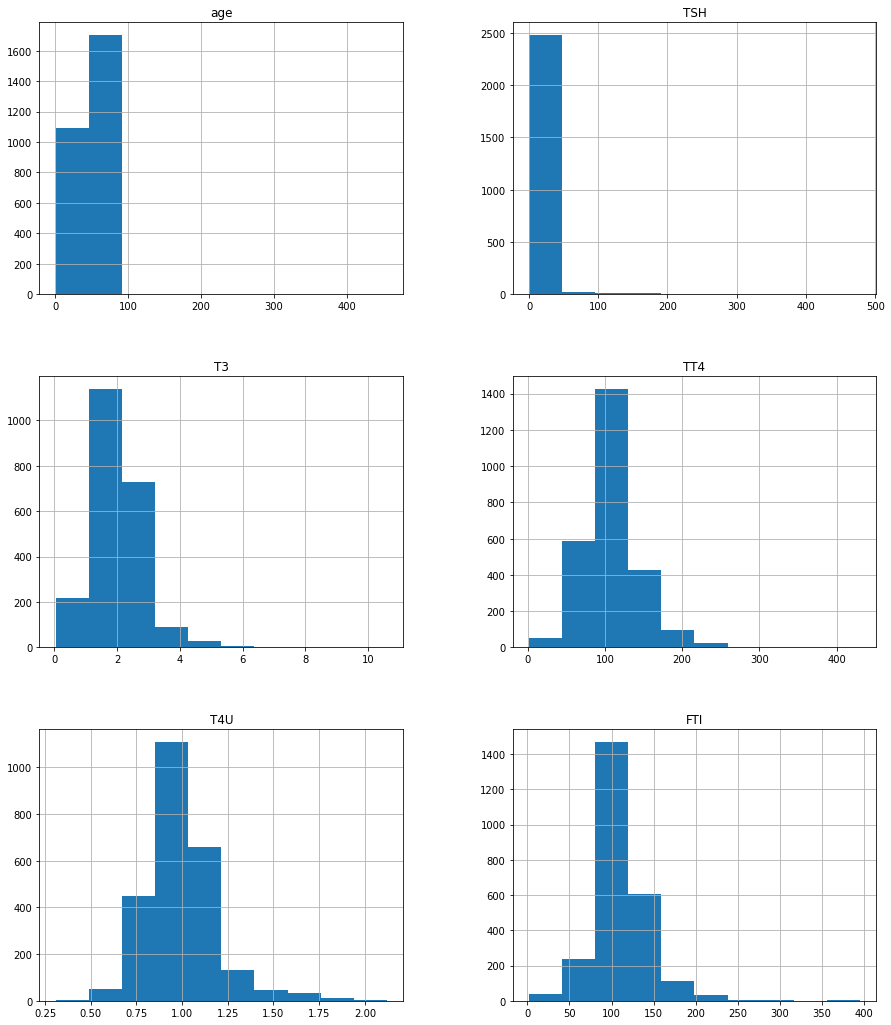

In [24]:
#will check the distribution of all the variables.

def show_hist(x):
    plt.rcParams['figure.figsize']=15,18
    x.hist()
    
show_hist(data_final)

### Most Features are not following the normal distribution, we need to standardise the data

# Bivariate Analysis

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


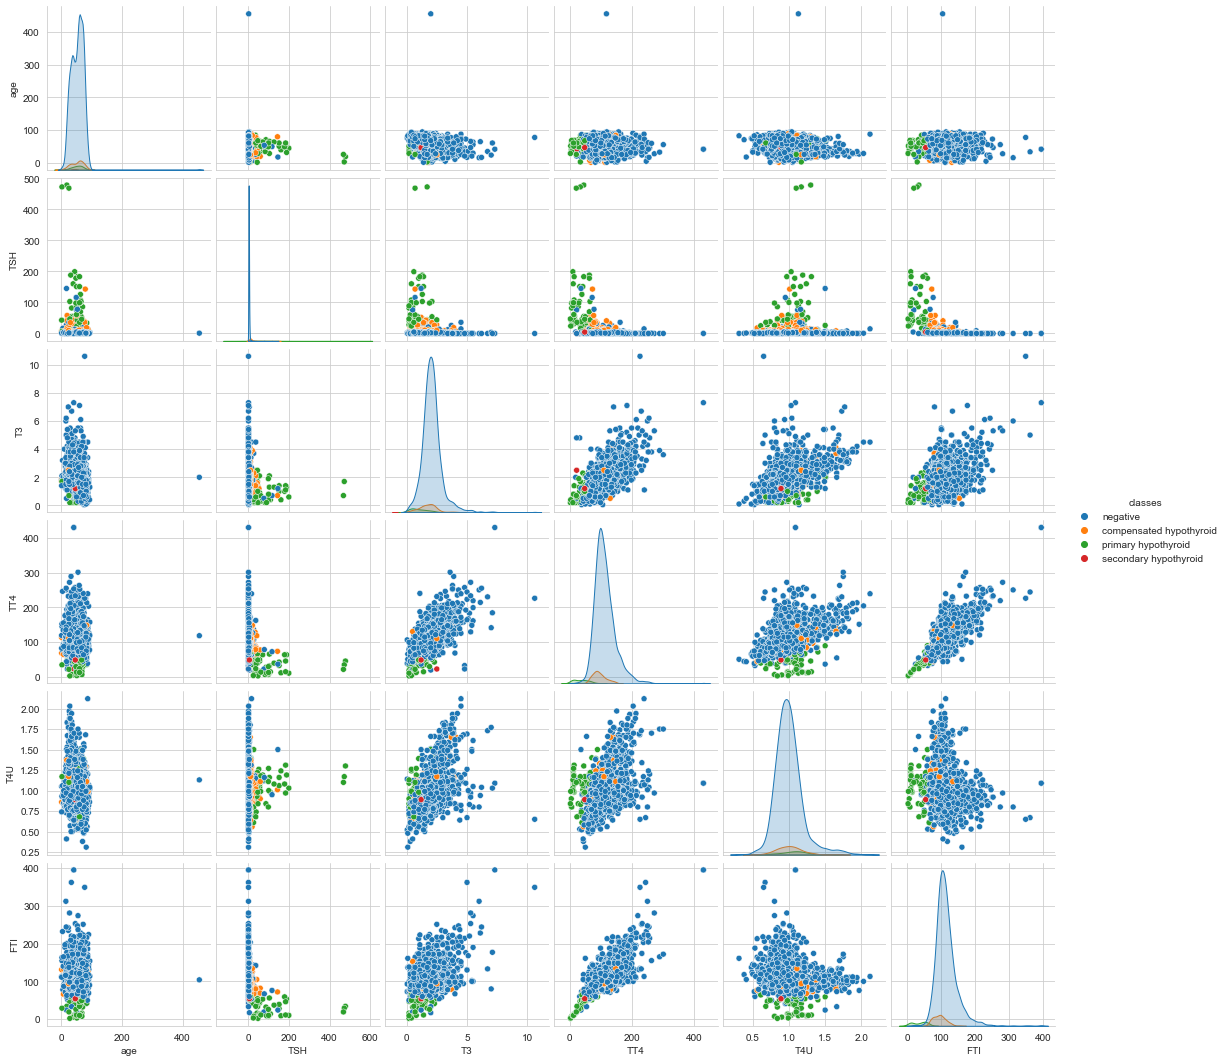

In [25]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(data_final, hue ='classes')
plt.show() 

## Check Outliers Detecting 

<AxesSubplot:xlabel='classes', ylabel='FTI'>

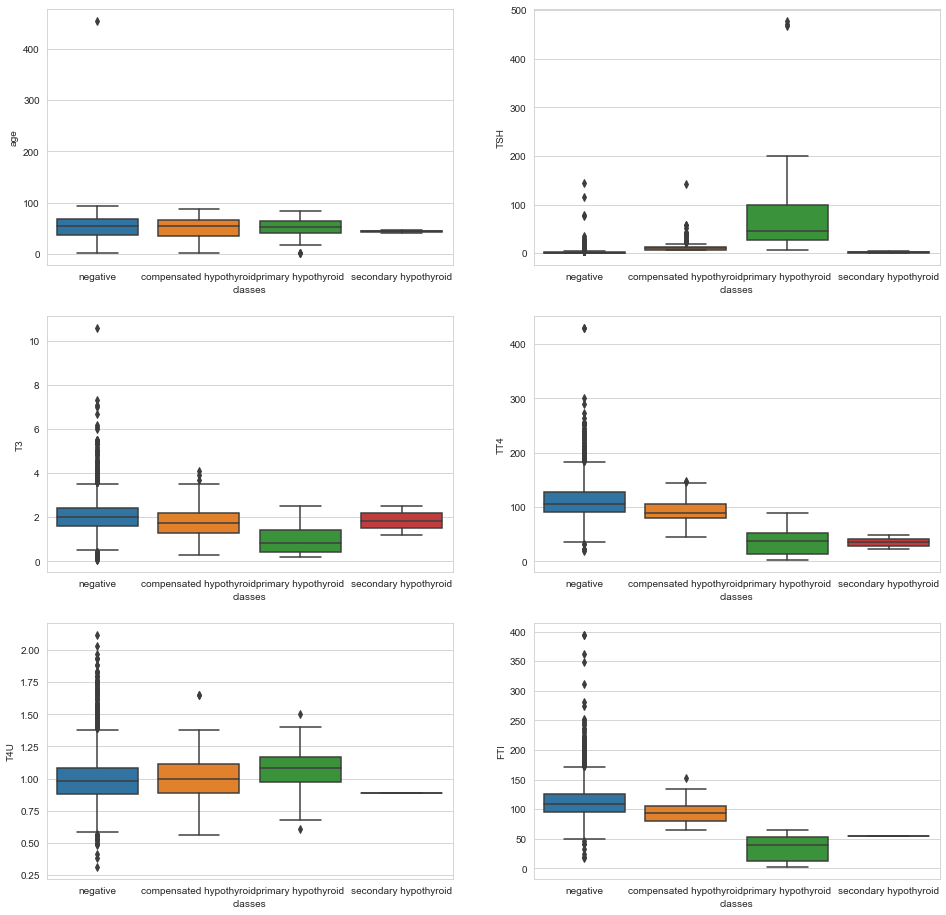

In [29]:
fig, axes = plt.subplots(3,2, figsize=(16, 16))

sns.boxplot(ax=axes[0, 0], data=data_final, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=data_final, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=data_final, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=data_final, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=data_final, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=data_final, x='classes', y='FTI')

# Handling missing values

In [30]:
from sklearn.impute import SimpleImputer

#Handle numerical features
simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(data_final.select_dtypes(exclude='O')))

#Handle categorical features
cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(data_final.select_dtypes(exclude='number')))

numerical_missing.columns=data_final.select_dtypes(exclude='O').columns
categorical_missing.columns=data_final.select_dtypes(exclude='number').columns

new_data=pd.concat([numerical_missing,categorical_missing],axis=1)

In [31]:
new_data.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [32]:
new_data.isnull().sum().sum()

0

## Outliers detection and removal
Since all the numerical features not following Normal distribution, will use percentile method to detect the outliers and remove them



In [33]:
new_data=new_data.drop(new_data.age.index[1364])

In [34]:
new_data.shape

(2799, 29)

In [35]:
new_data.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [36]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers

In [37]:
outliers_data=outliers_removal(new_data)
outliers_data

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
7,80.0,2.20,0.6,80.0,0.70,115.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
10,84.0,1.10,2.2,115.0,0.95,121.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
18,80.0,6.00,1.6,99.0,0.95,104.0,F,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
22,81.0,1.90,0.3,102.0,0.96,106.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
34,85.0,7.30,2.4,66.0,1.09,61.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,84.0,3.60,0.6,82.0,0.74,110.0,M,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
2774,82.0,2.20,1.0,68.0,0.77,88.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2783,82.0,0.50,2.0,125.0,0.84,149.0,F,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
2793,82.0,0.03,1.4,74.0,0.52,143.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative


In [38]:
new_df=new_data.drop(outliers_data.index)
new_df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [39]:
new_df.shape

(2666, 29)

In [40]:
new_df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [41]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [42]:
new_df.to_csv('Preprocessed_thyroid_data.csv',index=False)

In [43]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1] 

# Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2132, 28), (534, 28), (2132,), (534,))

# Encoding categorical data

## Encoding the Independent Variable

In [55]:
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train.select_dtypes(exclude='number')))
X_train_cat_encoded.columns = X_train.select_dtypes(exclude='number').columns

In [56]:
X_test_cat_encoded = pd.DataFrame(ordinal_encoder.transform(X_test.select_dtypes(exclude='number')))
X_test_cat_encoded.columns = X_test.select_dtypes(exclude='number').columns

## Encoding the Dependent Variable

In [58]:
label_encoder = LabelEncoder()
Y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(Y_train))
print(Y_train_cat_encoded.value_counts())
print(Y_train.value_counts())

1    1963
0     120
2      47
3       2
dtype: int64
negative                   1963
compensated hypothyroid     120
primary hypothyroid          47
secondary hypothyroid         2
Name: classes, dtype: int64


In [62]:
Y_test_cat_encoded = pd.DataFrame(label_encoder.transform(Y_test))

# Standardization

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc=pd.DataFrame(sc.fit_transform(X_train.select_dtypes(exclude='O')))
X_test_sc=pd.DataFrame(sc.transform(X_test.select_dtypes(exclude='O')))

X_train_sc.columns=X_train.select_dtypes(exclude='O').columns
X_test_sc.columns=X_test.select_dtypes(exclude='O').columns


In [64]:
X_train_final=pd.concat([X_train_sc,X_train_cat_encoded],axis=1)

X_test_final=pd.concat([X_test_sc,X_test_cat_encoded],axis=1)

In [65]:
X_test_final.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,-0.166733,-0.103331,-0.066462,0.221947,0.508917,-0.109916,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0
1,-0.166733,-0.131385,-0.728912,-0.325448,-0.783566,0.078237,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
2,-1.055282,8.588695,-0.993892,-1.333809,1.070866,-1.803297,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
3,0.943953,-0.156166,-0.331442,-0.210207,-0.446396,0.015519,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
4,1.443761,-0.159439,0.198517,-0.123776,0.508917,-0.454864,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0


In [66]:
X_train_final.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,1.221624,0.069667,-0.861402,-0.066156,0.396527,-0.329429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
1,-1.055282,-0.126710,0.331007,-0.584741,1.239451,-1.207478,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
2,0.333076,-0.170661,-0.463932,0.135517,-0.614981,0.548620,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
3,-0.166733,-0.194507,2.980805,2.296290,0.396527,2.053848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
4,0.499678,-0.131385,-0.331442,1.086257,0.621307,0.674056,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0


# Handling imbalanced Dataset
### Since the dataset is small, will use over-sampling: SMOTE technique to balance the data

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbours for this point. The synthetic points are added between the chosen point and its neighbours.

In [67]:
from imblearn.over_sampling import SMOTE

X_train_resample,Y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_train_final,Y_train_cat_encoded)
X_test_resample,Y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_test_final,Y_test_cat_encoded)

X_train_resample.shape,X_test_resample.shape,Y_train_resample.shape,Y_test_resample.shape

((7852, 28), (1476, 28), (7852, 1), (1476, 1))

In [69]:
pip install mlxtend

You should consider upgrading via the 'C:\Users\mysore\anaconda3\python.exe -m pip install --upgrade pip' command.

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [72]:
print('Training dataset shape:', X_train_resample.shape, Y_train_resample.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample.shape)

Y_train_resample_flat = Y_train_resample.to_numpy().ravel()
Y_test_resample_flat = Y_test_resample.to_numpy().ravel()

print('Training dataset shape:', X_train_resample.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample_flat.shape)

Training dataset shape: (7852, 28) (7852, 1)
Testing dataset shape: (1476, 28) (1476, 1)
Training dataset shape: (7852, 28) (7852,)
Testing dataset shape: (1476, 28) (1476,)


In [73]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train_resample, Y_train_resample_flat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   51.9s finished

[2021-09-08 19:00:42] Features: 1/10 -- score: 0.7921542122953047[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.3min finished

[2021-09-08 19:01:58] Features: 2/10 -- score: 0.9682877959188639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  1.2min finished

[2021-09-08 19:03:08] Features: 3/10 -- score: 0.9884107246388563[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [77]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

X_train_new=X_train_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]
X_test_new=X_test_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]


['TSH', 'TT4', 'FTI', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'T3_measured', 'FTI_measured', 'referral_source']


In [78]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)

In [80]:
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [81]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.67%
---------------------------------
Classification Report:
                     0            1            2       3  accuracy  \
precision     0.988419     1.000000     0.998473     1.0  0.996689   
recall        1.000000     0.987264     0.999491     1.0  0.996689   
f1-score      0.994176     0.993591     0.998982     1.0  0.996689   
support    1963.000000  1963.000000  1963.000000  1963.0  0.996689   

             macro avg  weighted avg  
precision     0.996723      0.996723  
recall        0.996689      0.996689  
f1-score      0.996687      0.996687  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1963    0    0    0]
 [  22 1938    3    0]
 [   1    0 1962    0]
 [   0    0    0 1963]]



In [82]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:97.15%
---------------------------------
Classification Report:
                    0           1           2  accuracy    macro avg  \
precision    0.921348    1.000000    1.000000  0.971545     0.973783   
recall       1.000000    0.973577    0.941057  0.971545     0.971545   
f1-score     0.959064    0.986612    0.969634  0.971545     0.971770   
support    492.000000  492.000000  492.000000  0.971545  1476.000000   

           weighted avg  
precision      0.973783  
recall         0.971545  
f1-score       0.971770  
support     1476.000000  
---------------------------------
Confusion Matrix:
[[492   0   0]
 [ 13 479   0]
 [ 29   0 463]]



In [86]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:94.42%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.927332     0.977047     0.889948     0.985442  0.944218   
recall        0.871116     0.954152     0.951605     1.000000  0.944218   
f1-score      0.898345     0.965464     0.919744     0.992668  0.944218   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.944218   

             macro avg  weighted avg  
precision     0.944942      0.944942  
recall        0.944218      0.944218  
f1-score      0.944055      0.944055  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1710   35  215    3]
 [  48 1873   16   26]
 [  86    9 1868    0]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:91.80%
---------------------------------
Classification Report:
                    0           1          2    3  accuracy    macro avg  \
precision    0.92920

C:\Users\mysore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
## Navie Bayes Classification

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb_model=gnb.fit(X_train_new,Y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
gnb_test_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:69.12%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.481175     0.969359     0.669094     0.939234  0.691161   
recall        0.651044     0.177280     0.936322     1.000000  0.691161   
f1-score      0.553367     0.299742     0.780467     0.968665  0.691161   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.691161   

             macro avg  weighted avg  
precision     0.764716      0.764716  
recall        0.691161      0.691161  
f1-score      0.650560      0.650560  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1278   11  636   38]
 [1283  348  273   59]
 [  95    0 1838   30]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:67.68%
---------------------------------
Classification Report:
                    0           1           2    3  accuracy    macro avg  \
precision    0.5703

C:\Users\mysore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.90%
---------------------------------
Classification Report:
                     0            1       2            3  accuracy  \
precision     0.996447     0.999489     1.0     1.000000  0.998981   
recall        1.000000     0.996434     1.0     0.999491  0.998981   
f1-score      0.998220     0.997959     1.0     0.999745  0.998981   
support    1963.000000  1963.000000  1963.0  1963.000000  0.998981   

             macro avg  weighted avg  
precision     0.998984      0.998984  
recall        0.998981      0.998981  
f1-score      0.998981      0.998981  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1963    0    0    0]
 [   7 1956    0    0]
 [   0    0 1963    0]
 [   0    1    0 1962]]

Test Result:
Accuracy Score:98.04%
---------------------------------
Classification Report:
                   0           1           2  accuracy    macro avg  \
precision    0.95534    0.987928    1.000000  0.98

In [89]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.02%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.967456     0.999470     0.995941     0.998982  0.990194   
recall        0.999491     0.961284     1.000000     1.000000  0.990194   
f1-score      0.983212     0.980005     0.997966     0.999491  0.990194   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.990194   

             macro avg  weighted avg  
precision     0.990462      0.990462  
recall        0.990194      0.990194  
f1-score      0.990169      0.990169  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1962    1    0    0]
 [  66 1887    8    2]
 [   0    0 1963    0]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:80.56%
---------------------------------
Classification Report:
                    0           1           2  accuracy    macro avg  \
precision    0.744186   